In [113]:
# Анализ Google Trends по запросам 'tele2' и 'altel'

In [ ]:
# !pip install pytrends

In [18]:
import pandas as pd
from pytrends.request import TrendReq
import seaborn as sns

In [47]:
# get Google Trends data of keywords such as 'tele2' and 'altel'

pytrend = TrendReq()
pytrend.build_payload(kw_list=['теле2','алтел','tele2', 'altel'], geo='KZ')
df = pytrend.interest_by_region()

print('Count of Google searches %')
df.head()

Count of Google searches %


,теле2,алтел,tele2,altel
geoName,,,,
Akmola Region,54,34,7,5
Aktobe Region,45,40,7,8
Almaty Region,51,34,8,7
Atyrau Province,28,50,7,15
East Kazakhstan Region,50,36,7,7


In [32]:
df.describe()

,теле2,алтел,tele2,altel
count,14.000000,14.000000,14.000000,14.000000
mean,49.642857,35.214286,8.000000,7.142857
std,9.700176,7.904999,1.358732,3.034599
min,28.000000,26.000000,6.000000,4.000000
25%,46.250000,28.500000,7.000000,5.000000
50%,51.500000,33.500000,8.000000,6.000000
75%,57.500000,39.000000,9.000000,8.000000
max,61.000000,50.000000,11.000000,15.000000


Relationship between алтел and tele2 is linear negative


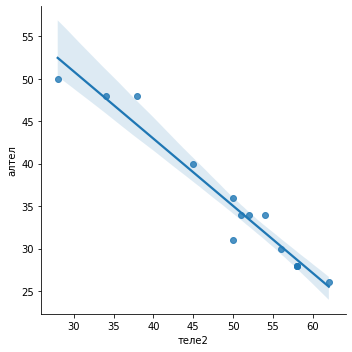

In [54]:
ax = sns.lmplot(x='теле2', y='алтел', data=df) 
print('Relationship between алтел and tele2 is linear negative')

# в регионах где популярен теле2 возможно не используют алтел или наоброт

In [59]:
print('TOP-5 regions теле2')
df.sort_values(['теле2'], ascending=False).head()

TOP-5 regions теле2


,теле2,алтел,tele2,altel
geoName,,,,
North Kazakhstan Province,62,26,8,4
Kostanay Region,58,28,8,6
Pavlodar Province,58,28,9,5
West Kazakhstan Province,58,28,9,5
Jambyl Province,56,30,9,5


In [60]:
print('TOP-5 regions алтел')
df.sort_values(['алтел'], ascending=False).head()

TOP-5 regions алтел


,теле2,алтел,tele2,altel
geoName,,,,
Atyrau Province,28,50,7,15
Karagandy Region,38,48,6,8
Mangystau Region,34,48,6,12
Aktobe Region,45,40,7,8
East Kazakhstan Region,50,36,7,7


In [ ]:
# так как самым mах поиском обладает теле2, посмотрим что они обычно ищут  

In [94]:
pytrend.build_payload(kw_list=['теле2'], geo='KZ')

In [93]:
related_queries = pytrend.related_queries()
related_queries.values()
# в лидере стоит теле2 тарифы

dict_values([{'top':                       query  value
0              теле2 тарифы    100
1               теле2 тариф     92
2               теле2 номер     57
3           теле2 казахстан     39
4            теле2 интернет     26
5                  теле2 кз     24
6                    теле 2     23
7        узнать номер теле2     23
8             кабинет теле2     22
9              баланс теле2     22
10           личный кабинет     21
11     теле2 личный кабинет     20
12              теле2 центр     20
13             теле2 алматы     19
14   как узнать номер теле2     19
15                   билайн     19
16           тариф на теле2     19
17                    актив     17
18            как проверить     17
19         свой номер теле2     16
20                    алтел     16
21             крутой теле2     15
22  узнать свой номер теле2     15
23        теле2 то что надо     15
24              то что надо     15, 'rising':                              query   value
0              

In [95]:
# Посмотрим количество запросов теле2 по времени 

time_df = pytrend.interest_over_time()
time_df.head()

,теле2,isPartial
date,,
2015-03-08,31,False
2015-03-15,35,False
2015-03-22,32,False
2015-03-29,30,False
2015-04-05,30,False


Text(0.5, 1.0, 'Count of quieries by time')

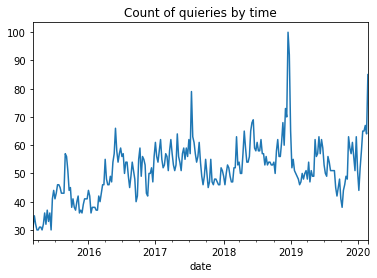

In [106]:
X = time_df.index
y = time_df['теле2']

ax=y.plot()
ax.set_title('Count of quieries by time')

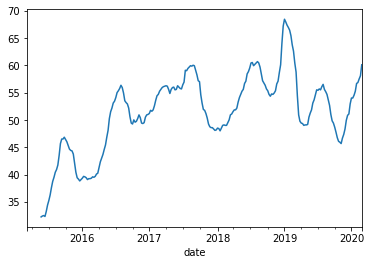

In [110]:
y.rolling(12).mean().plot()

# trend without seasonability


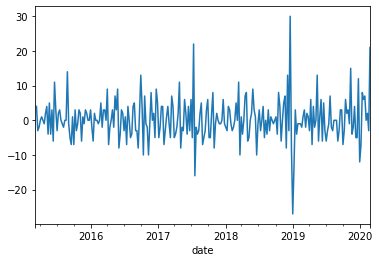

In [111]:
y.diff().plot()
# seasonability without trend 